Popularity based recommedation systems are a great start in achieving excellent results whenever a customer logins into the business's site.

In [21]:
#Importing dependencies 
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
plt.style.use("ggplot")
import sklearn 
from sklearn.decomposition import TruncatedSVD

In [22]:
#Loading the dataset
ratings = pd.read_csv("ratings_Beauty.csv")
ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [24]:
ratings.dropna()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [25]:
#Grouping the important columns together 
pop_products = pd.DataFrame(ratings.groupby('ProductId')['Rating'].count())
most_pop = pop_products.sort_values('Rating', ascending=False)
most_pop.head(15)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


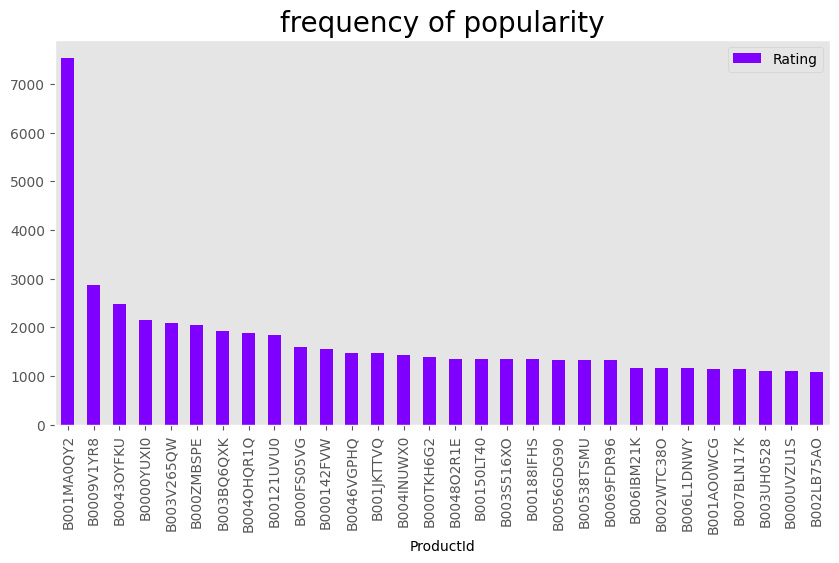

In [26]:
import matplotlib.pyplot as plt 
color = plt.cm.rainbow(np.linspace(0, 1, 40))
most_pop.head(30).plot.bar(color = color, figsize=(10,5))
plt.title('frequency of popularity', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Analysis:
The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of just below 3000.

**Utility Matrix based on products sold and user reviews and Model-based collaborative filtering system.**

In this case, a collaborative filtering technique centered on a model is selected because it aids in predicting products for a specific user by recognizing patterns derived from the preferences found in various user data sets.

Utility Matrix : 
The utility matrix comprises the complete set of user-item preferences (ratings) depicted in matrix form. As users typically do not purchase every item in the list, the utility matrix is sparse, with many values remaining unknown.


In [27]:
#Subset of the Ratings 
ratings1 = ratings.head(10000)

In [28]:
ratings_UM = ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_UM.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As anticipated, the resulting utility matrix is sparse; I have replaced the unknown values with zeros.

In [29]:
#Transposing the Matrix 
X = ratings_UM.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Decomposing the Matrix

In [32]:
SVD = TruncatedSVD(n_components=10)
decomp_matrix = SVD.fit_transform(X)
decomp_matrix.shape

(886, 10)

In [34]:
correlation_matrix = np.corrcoef(decomp_matrix)
correlation_matrix.shape

(886, 886)

Okay so now we randomly choose a product, say, ID # 6117036094. As we've picked this item, we've to isolate it from the Correlation Matrix.

In [35]:
#Assuming the customer buys Product ID # 6117036094 (randomly chosen)
X.index[99]


'6117036094'

In [36]:
#Index # of product ID purchased by customer :
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [37]:
#Correlation is calculated for all items in relation to the item bought by this customer, considering items rated by other customers who have purchased the same product.
correl_product_ID = correlation_matrix[product_ID]
#Recommending top 10 highly correlated products in sequence 
Recommend = list(X.index[correl_product_ID > 0.90])
Recommend.remove(i) #removes the bought product
Recommend[0:9]

['0205616461',
 '1304196070',
 '1304351475',
 '1304482634',
 '1412759676',
 '1879187396',
 '3423470476',
 '360211600X',
 '4057362967']


*The recommendation system showcases the top 10 products to the mentioned customer, determined by analyzing the purchase history of other customers on the website.*